<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(0)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.815447,51.865899,96.910879,82.727434,1.248296,311.567954,310.308239,1.259716
1,0.0,1.0,56.881449,96.907751,32.669876,63.973833,0.056063,260.488972,260.382500,0.106473
2,0.0,2.0,96.267887,34.955210,71.975670,38.440994,1.021701,252.661461,251.296962,1.364499
3,0.0,3.0,84.000413,61.262728,24.078468,89.370902,0.539227,269.251739,268.256802,0.994938
4,0.0,4.0,67.357061,72.385754,68.231523,87.570552,0.094282,305.639172,305.453193,0.185979
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.305669,84.017419,68.699442,74.883318,-1.548682,304.357165,305.827737,-1.470572
59996,999.0,56.0,28.135304,87.224719,46.331806,87.653545,0.680033,260.025408,259.815315,0.210093
59997,999.0,57.0,37.732780,75.195122,71.662200,81.532771,1.385937,277.508809,276.487217,1.021592
59998,999.0,58.0,31.127835,88.214760,73.480479,93.324819,-0.375230,295.772662,296.596949,-0.824287


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.815447,51.865899,96.910879,82.727434,1.248296,311.567954,310.308239,1.259716
1,0.0,1.0,56.881449,96.907751,32.669876,63.973833,0.056063,260.488972,260.382500,0.106473
2,0.0,2.0,96.267887,34.955210,71.975670,38.440994,1.021701,252.661461,251.296962,1.364499
3,0.0,3.0,84.000413,61.262728,24.078468,89.370902,0.539227,269.251739,268.256802,0.994938
4,0.0,4.0,67.357061,72.385754,68.231523,87.570552,0.094282,305.639172,305.453193,0.185979
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.305669,84.017419,68.699442,74.883318,-1.548682,304.357165,305.827737,-1.470572
59996,999.0,56.0,28.135304,87.224719,46.331806,87.653545,0.680033,260.025408,259.815315,0.210093
59997,999.0,57.0,37.732780,75.195122,71.662200,81.532771,1.385937,277.508809,276.487217,1.021592
59998,999.0,58.0,31.127835,88.214760,73.480479,93.324819,-0.375230,295.772662,296.596949,-0.824287


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.815447  51.865899  96.910879  82.727434  1.248296  311.567954   
      1.0    56.881449  96.907751  32.669876  63.973833  0.056063  260.488972   
      2.0    96.267887  34.955210  71.975670  38.440994  1.021701  252.661461   
      3.0    84.000413  61.262728  24.078468  89.370902  0.539227  269.251739   
      4.0    67.357061  72.385754  68.231523  87.570552  0.094282  305.639172   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   68.305669  84.017419  68.699442  74.883318 -1.548682  304.357165   
      56.0   28.135304  87.224719  46.331806  87.653545  0.680033  260.025408   
      57.0   37.732780  75.195122  71.662200  81.532771  1.385937  277.508809   
      58.0   31.127835  88.214760  73.480479  93.324819 -0.375230  295.772662   
      59.0   28.244292  99.449596  62.289302  95.664930  0.896585  296.544705   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    310.308239  1.259716  
      1.0    260.382500  0.106473  
      2.0    251.296962  1.364499  
      3.0    268.256802  0.994938  
      4.0    305.453193  0.185979  
...                 ...       ...  
999.0 55.0   305.827737 -1.470572  
      56.0   259.815315  0.210093  
      57.0   276.487217  1.021592  
      58.0   296.596949 -0.824287  
      59.0   296.091222  0.453483  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.815447  51.865899  96.910879  82.727434  1.248296  311.567954   
      1.0    56.881449  96.907751  32.669876  63.973833  0.056063  260.488972   
      2.0    96.267887  34.955210  71.975670  38.440994  1.021701  252.661461   
      3.0    84.000413  61.262728  24.078468  89.370902  0.539227  269.251739   
      4.0    67.357061  72.385754  68.231523  87.570552  0.094282  305.639172   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   68.305669  84.017419  68.699442  74.883318 -1.548682  304.357165   
      56.0   28.135304  87.224719  46.331806  87.653545  0.680033  260.025408   
      57.0   37.732780  75.195122  71.662200  81.532771  1.385937  277.508809   
      58.0   31.127835  88.214760  73.480479  93.324819 -0.375230  295.772662   
      59.0   28.244292  99.449596  62.289302  95.664930  0.896585  296.544705   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    310.308239  1.259716  
      1.0    260.382500  0.106473  
      2.0    251.296962  1.364499  
      3.0    268.256802  0.994938  
      4.0    305.453193  0.185979  
...                 ...       ...  
999.0 55.0   305.827737 -1.470572  
      56.0   259.815315  0.210093  
      57.0   276.487217  1.021592  
      58.0   296.596949 -0.824287  
      59.0   296.091222  0.453483  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.815447,51.865899,96.910879,82.727434,1.248296,311.567954,310.308239,1.259716
1,0.0,1.0,56.881449,96.907751,32.669876,63.973833,0.056063,260.488972,260.382500,0.106473
2,0.0,2.0,96.267887,34.955210,71.975670,38.440994,1.021701,252.661461,251.296962,1.364499
3,0.0,3.0,84.000413,61.262728,24.078468,89.370902,0.539227,269.251739,268.256802,0.994938
4,0.0,4.0,67.357061,72.385754,68.231523,87.570552,0.094282,305.639172,305.453193,0.185979
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.305669,84.017419,68.699442,74.883318,-1.548682,304.357165,305.827737,-1.470572
59996,999.0,56.0,28.135304,87.224719,46.331806,87.653545,0.680033,260.025408,259.815315,0.210093
59997,999.0,57.0,37.732780,75.195122,71.662200,81.532771,1.385937,277.508809,276.487217,1.021592
59998,999.0,58.0,31.127835,88.214760,73.480479,93.324819,-0.375230,295.772662,296.596949,-0.824287


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.815447  51.865899  96.910879  82.727434  1.248296  311.567954   
      1.0    56.881449  96.907751  32.669876  63.973833  0.056063  260.488972   
      2.0    96.267887  34.955210  71.975670  38.440994  1.021701  252.661461   
      3.0    84.000413  61.262728  24.078468  89.370902  0.539227  269.251739   
      4.0    67.357061  72.385754  68.231523  87.570552  0.094282  305.639172   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   68.305669  84.017419  68.699442  74.883318 -1.548682  304.357165   
      56.0   28.135304  87.224719  46.331806  87.653545  0.680033  260.025408   
      57.0   37.732780  75.195122  71.662200  81.532771  1.385937  277.508809   
      58.0   31.127835  88.214760  73.480479  93.324819 -0.375230  295.772662   
      59.0   28.244292  99.449596  62.289302  95.664930  0.896585  296.544705   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    310.308239  1.259716  
      1.0    260.382500  0.106473  
      2.0    251.296962  1.364499  
      3.0    268.256802  0.994938  
      4.0    305.453193  0.185979  
...                 ...       ...  
999.0 55.0   305.827737 -1.470572  
      56.0   259.815315  0.210093  
      57.0   276.487217  1.021592  
      58.0   296.596949 -0.824287  
      59.0   296.091222  0.453483  

[60000 rows x 8 columns]

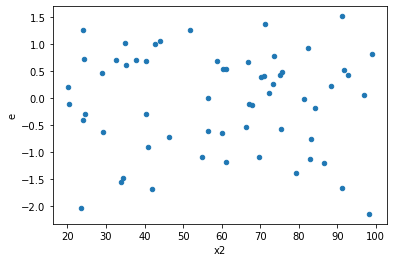

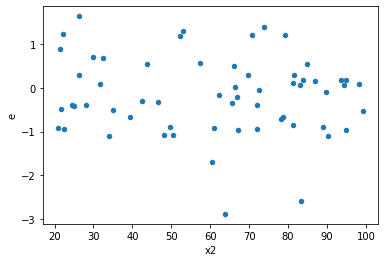

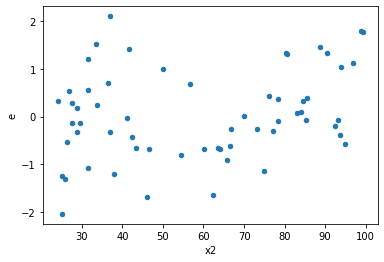

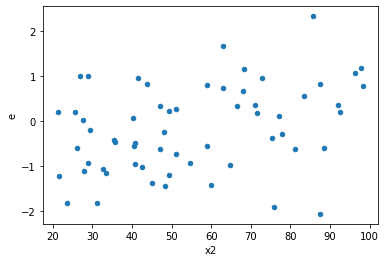

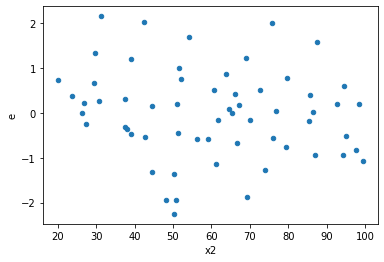

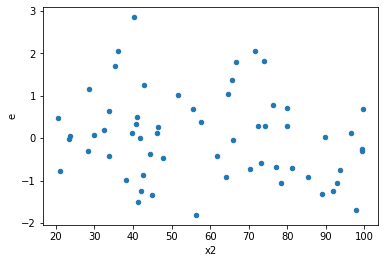

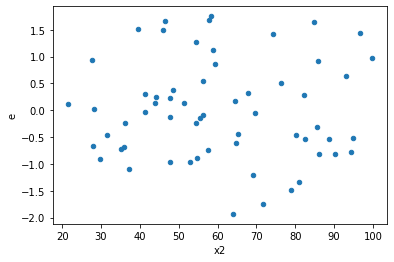

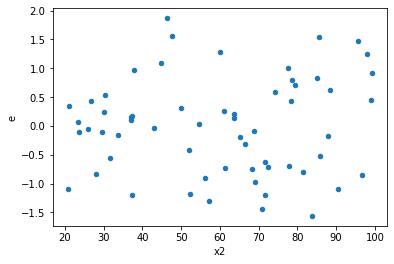

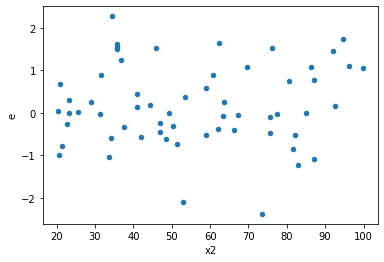

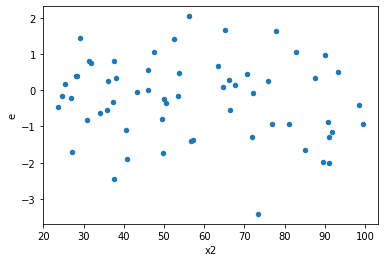

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,20.0,20.0,16.153781151491437,22.589033161960256,0.8076890575745719,1.1294516580980127,1.3983743465457725,0.46004954519818053,0.7699752274009097,0.23002477259909027,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,13.488206139811062,19.061662751896133,0.6744103069905532,0.9530831375948067,1.4132096258252427,0.4461169332824595,0.7769415333587703,0.22305846664122975,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,12.207294553515585,16.32957195385511,0.6103647276757792,0.8164785976927554,1.337689680728835,0.5212763783018546,0.7393618108490727,0.2606381891509273,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,14.078337284095896,17.290968888189237,0.7039168642047948,0.8645484444094619,1.2281968061471724,0.6501767460793517,0.6749116269603241,0.32508837303967586,Reject001=1 : Homoscedasticity
9.0,20.0,20.0,19.679959608166598,29.95448850102728,0.9839979804083299,1.4977244250513642,1.5220807917002566,0.35531646664807726,0.8223417666759614,0.17765823332403863,Reject001=1 : Homoscedasticity
11.0,20.0,20.0,18.264045386808405,24.74621995945752,0.9132022693404203,1.237310997972876,1.3549145019827318,0.5031893004442491,0.7484053497778754,0.25159465022212457,Reject001=1 : Homoscedasticity
13.0,20.0,20.0,13.693650438000633,24.635738161058217,0.6846825219000316,1.231786908052911,1.799062877543061,0.1978030121025487,0.9010984939487257,0.09890150605127435,Reject001=1 : Homoscedasticity
15.0,20.0,20.0,15.693095273814286,25.399596143578957,0.7846547636907143,1.2699798071789479,1.6185204830790183,0.28990970015843276,0.8550451499207836,0.14495485007921638,Reject001=1 : Homoscedasticity
16.0,20.0,20.0,15.64695241091377,32.43682696112813,0.7823476205456885,1.6218413480564067,2.0730443928814792,0.11120448434032215,0.9443977578298389,0.055602242170161076,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,20.94170604937611,13.126091425924471,1.0470853024688054,0.6563045712962235,0.6267918857697614,0.3044138234441697,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,14.823734587520406,12.868812476408227,0.7411867293760203,0.6434406238204113,0.8681221591246001,0.7549066978215949,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,16.677063391313652,11.393113828363251,0.8338531695656826,0.5696556914181625,0.6831606716981973,0.4015103616896935,Reject001=1 : Homoscedasticity
3.0,20.0,20.0,16.153781151491437,22.589033161960256,0.8076890575745719,1.1294516580980127,1.3983743465457725,0.46004954519818053,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,17.324752630456704,16.331293111635606,0.8662376315228352,0.8165646555817803,0.9426566404720488,0.8962516040751973,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,23.79581642622656,16.794064670623587,1.189790821311328,0.8397032335311794,0.7057570276140644,0.4426953912942233,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,13.488206139811062,19.061662751896133,0.6744103069905532,0.9530831375948067,1.4132096258252427,0.4461169332824595,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,12.207294553515585,16.32957195385511,0.6103647276757792,0.8164785976927554,1.337689680728835,0.5212763783018546,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,14.078337284095896,17.290968888189237,0.7039168642047948,0.8645484444094619,1.2281968061471724,0.6501767460793517,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      990
Reject001=0 : Heteroscedasticity     10
Name: Result_test, dtype: int64